In [1]:
from Bio import SeqIO
import os,sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import phylopandas as ph

In [5]:
df = ph.read_fasta("clear_taxa_rmS_al.fasta")
df = df.filter(['id','sequence'], axis=1)
df[['Accession','species','host','date']] = df.id.str.split("|",expand=True)

,id,sequence,Accession,species,host,date
0,NC_026011|China_Rattus_coronavirus_HKU24|Rattu...,-------------------atggttataatttttct-------gct...,NC_026011,China_Rattus_coronavirus_HKU24,Rattus_norvegicus,5/17/12
1,KM349744|China_Rattus_coronavirus_HKU24|Rattus...,-------------------atggttataatttttct-------gct...,KM349744,China_Rattus_coronavirus_HKU24,Rattus_norvegicus,5/17/12
2,KM349743|China_Rattus_coronavirus_HKU24|Rattus...,-------------------atggttataatttttct-------gct...,KM349743,China_Rattus_coronavirus_HKU24,Rattus_norvegicus,5/17/12
3,KM349742|China_Rattus_coronavirus_HKU24|Rattus...,-------------------atggttataatttttct-------gct...,KM349742,China_Rattus_coronavirus_HKU24,Rattus_norvegicus,5/17/12
4,NC_039207|Hedgehog_coronavirus_1|Erinaceus_eur...,-------------------------atgatacgctc-------agc...,NC_039207,Hedgehog_coronavirus_1,Erinaceus_europaeus,2012
...,...,...,...,...,...,...
4096,JQ065048|nan|nan|nan,atg-------------tacaggtttgctatactaat-------gtt...,JQ065048,nan,nan,nan
4097,JQ065047|nan|nan|nan,atg-------------caatgtgttgttttagtttt-------aac...,JQ065047,nan,nan,nan
4098,JQ065046|nan|nan|nan,atg-------------cggggagctatattaacttt-------aat...,JQ065046,nan,nan,nan
4099,JQ065045|nan|nan|nan,atg-------------cagggagctctactgatc----------ac...,JQ065045,nan,nan,nan


In [15]:
species=df.groupby(['species']).count()

species.reset_index(level=['species'], inplace=True)
species.to_csv("species_S.csv")

In [17]:
species2=pd.read_csv("species_S.csv")
species2

,species,id,sequence,Accession,host,date
0,Bat_Hp-betacoronavirus_Zhejiang2013,2,2,2,2,2
1,Bat_coronavirus_BM48-31/BGR/2008,1,1,1,1,1
2,Betacoronavirus_1,894,894,894,894,894
3,Betacoronavirus_BtCoV/KW2E-F93/Nyc_spec/GHA/2010,1,1,1,1,1
4,Betacoronavirus_sp.,11,11,11,11,11
5,BtRf-BetaCoV/HuB2013,1,1,1,1,1
6,Camel_coronavirus_HKU23,2,2,2,2,2
7,China_Rattus_coronavirus_HKU24,4,4,4,4,4
8,Coronavirus_BtRl-BetaCoV,6,6,6,6,6
9,Eidolon_bat_coronavirus,1,1,1,1,1


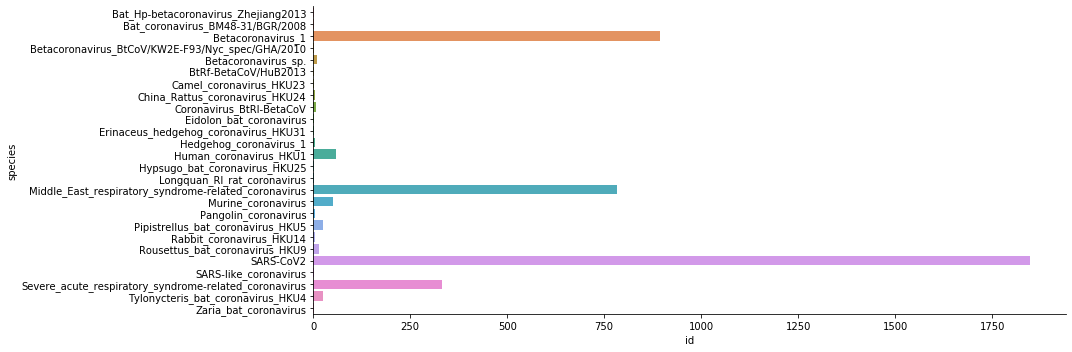

In [24]:
ax1=sns.catplot(data=species2,x="id",y="species",kind="bar",aspect = 3)


In [26]:
ax1.savefig("species_S.png")